In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
from sklearn.preprocessing import StandardScaler
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Load the dataset
data = pd.read_csv(os.path.join(dirname, filename), nrows=200000)

# Let's choose some features for our linear regression model
# You can select any column(s) you think might be relevant
features = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)']

# Remove rows with missing values in selected features
data = data.dropna(subset=features)

# Define X (features) and y (target variable)
X = data[features]
y = data['Severity']  # For example, predicting severity of accidents

# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

/kaggle/input/us-accidents/US_Accidents_March23.csv
Mean Squared Error: 0.2309605009424797


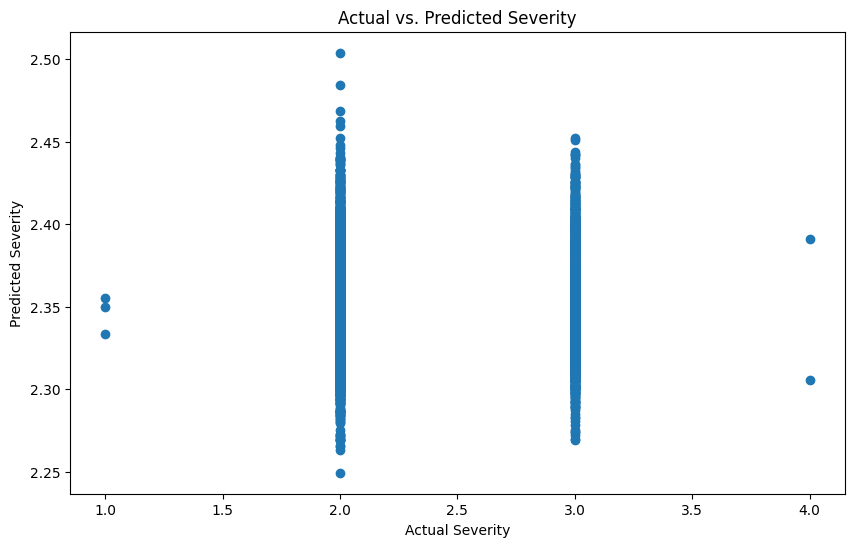

R-squared: 0.0017359987618150718
Mean Absolute Error: 0.45709571822765116


In [33]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Severity')
plt.ylabel('Predicted Severity')
plt.title('Actual vs. Predicted Severity')
plt.show()

# Calculate R-squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print('R-squared:', r2)

# Calculate Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)

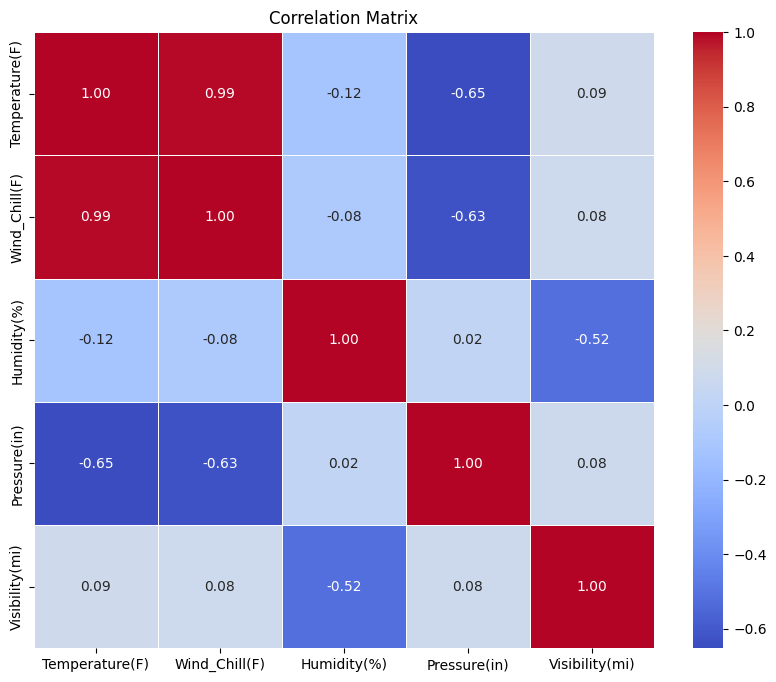

In [34]:

import seaborn as sns
# Calculate correlation matrix
correlation_matrix = data_no_outliers[['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)']].corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()